Import library : 

In [1]:
!pip install datasets
!pip install transformers
from datasets import load_dataset


import re 

# torch library: 
import torch
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

from tqdm.notebook import tqdm


# transformer : 
from transformers import AutoTokenizer, AutoModelForMaskedLM
from transformers import BertForSequenceClassification
from transformers import AdamW, get_linear_schedule_with_warmup

# sklearn: 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import f1_score,accuracy_score

# pandas : 
import pandas as pd 
# numpy 
import numpy as np 


# matplotlib
import matplotlib.pyplot as plt


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 362 kB 8.1 MB/s 
     |████████████████████████████████| 212 kB 65.2 MB/s 
     |████████████████████████████████| 140 kB 39.6 MB/s 
     |████████████████████████████████| 1.1 MB 43.5 MB/s 
     |████████████████████████████████| 101 kB 2.9 MB/s 
     |████████████████████████████████| 596 kB 62.3 MB/s 
     |████████████████████████████████| 127 kB 58.1 MB/s 
     |████████████████████████████████| 271 kB 56.2 MB/s 
     |████████████████████████████████| 144 kB 50.4 MB/s 
     |████████████████████████████████| 94 kB 4.1 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
ERROR: pip's depe

Load data set : 

In [2]:
train  = load_dataset('persiannlp/parsinlu_entailment',split="train")
test  = load_dataset('persiannlp/parsinlu_entailment',split="test")
validation  = load_dataset('persiannlp/parsinlu_entailment',split="validation")



Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/755 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1675 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/270 [00:00<?, ? examples/s]

Dataset parsinlu_entailment downloaded and prepared to /root/.cache/huggingface/datasets/persiannlp___parsinlu_entailment/parsinlu-repo/1.0.0/a99ad431d1637751f03fa9da3de66a41e93983d11116a0918a6efaaa72343d2d. Subsequent calls will reuse this data.


Reusing dataset parsinlu_entailment (/root/.cache/huggingface/datasets/persiannlp___parsinlu_entailment/parsinlu-repo/1.0.0/a99ad431d1637751f03fa9da3de66a41e93983d11116a0918a6efaaa72343d2d)
Reusing dataset parsinlu_entailment (/root/.cache/huggingface/datasets/persiannlp___parsinlu_entailment/parsinlu-repo/1.0.0/a99ad431d1637751f03fa9da3de66a41e93983d11116a0918a6efaaa72343d2d)


Creating train dataframe : 

In [3]:
train_data = pd.DataFrame()

category = [i['category'] for i in list(train)]
label = [i['label'] for i in list(train)]
sent1 = [i['sent1'] for i in list(train)]
sent2 = [i['sent2'] for i in list(train)]

train_data['category'] = category
train_data['label'] = label
train_data['sent1'] = sent1
train_data['sent2'] = sent2

print(train_data.shape)
train_data.head()




(755, 4)


,category,label,sent1,sent2
0,translation-train,c,زنان به قدری بخش بزرگی از نیروی کار را تشکیل م...,مردان بخش عظیمی از نیروی کار هستند بنابراین تن...
1,translation-train,n,سالها است که کنگره در تلاش است تا اثربخشی مدیر...,کنگره بودجه ویژه ای برای مدیریت اطلاعات و فناو...
2,natural-wiki,n,سرامیک‌های زیست خنثی پس از قرارگیری در بدن میز...,خواص فیزیکی سرامیک‌ها قابل اندازه گیری است.
3,translation-train,e,دولت از هیچ قانونی که منجر به کاهش چشمگیر توان...,قانونی که باعث کاهش استفاده از زغال سنگ به عنو...
4,natural-wiki,n,روش‌ها و الگوریتم‌های بهینه‌سازی به دو دسته ال...,آمار در دروس مدیریتی نقش مهمی را بازی میکند.


Creating test dataframe : 

In [4]:
test_data = pd.DataFrame()

category = [i['category'] for i in list(test)]
label = [i['label'] for i in list(test)]
sent1 = [i['sent1'] for i in list(test)]
sent2 = [i['sent2'] for i in list(test)]

test_data['category'] = category
test_data['label'] = label
test_data['sent1'] = sent1
test_data['sent2'] = sent2

print(test_data.shape)
test_data.head()




(1675, 4)


,category,label,sent1,sent2
0,natural-wiki,c,او را نیز بکشتند و پس از او، هیچ‌کس را نیافتند...,او را نیز بکشتند و پس از او پسرش را شایسته تری...
1,translation-train,n,آنها به عنوان (الف) رسید جبران خسارت طبقه بندی...,چیز خوبی است که آنها در این دسته قرار می گیرند.
2,natural-miras,n,نعمت‌زاده همچنین با اشاره به ارتقاء کیفیت خودر...,به گفته‌ی وی تولید خودرو در مقایسه با سال‌های ...
3,natural-miras,c,صابر دین‌پژوه‌ رتبه اول علوم ریاضی و فنی کنکور...,رتبه‌ی اول علوم ریاضی و فنی کنکور از نتیجه‌ی ک...
4,translation-train,e,مورد دیگری که باید ببینید ، فیلم خوابیدن با دش...,باید خوابیدن با دشمن را ببینی.


In [5]:
validation_data = pd.DataFrame()

category = [i['category'] for i in list(validation)]
label = [i['label'] for i in list(validation)]
sent1 = [i['sent1'] for i in list(validation)]
sent2 = [i['sent2'] for i in list(validation)]

validation_data['category'] = category
validation_data['label'] = label
validation_data['sent1'] = sent1
validation_data['sent2'] = sent2

print(validation_data.shape)
validation_data.head()



(270, 4)


,category,label,sent1,sent2
0,translation-train,c,باشه خداحافظ,صبر کن!
1,translation-train,e,من در هلیکوپتر، در لبه صندلی ام نشسته بودم.,من روی لبه صندلی خود نشسته بودم.
2,natural-voa,c,آقای سيا قرار بود روز جمعه طی مصاحبه مطبوعاتی ...,سیا در سازمان جهانی بهداشت با خبرنگاران صحبت کرد.
3,natural-voa,c,پس از مرگ شوهرش، بستگان شوهر به او گفتند که اگ...,بستگان شوهر خانه‌ را به او اهدا کردند.
4,natural-voa,n,دستياران وی، علت انزوای او را استراحت پس از مب...,او پس از مبارزات انتخاباتی، برای 100 روز به اس...


preprocessing function : 

In [6]:
def clean_text(text):
    text = re.sub(r'^https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub('\t', ' ',  text)
    text = re.sub(r" +", ' ', text)
    text = re.sub(r"؟!.،,?" ,' ', text)
    text = re.sub(r'[^\w]', ' ', text)
    text = re.sub(r"\S+@\S+", ' ', text)
    return text



Preprocessing train, test and validation data : 

In [7]:
train_data['sent1'] = train_data['sent1'].apply(clean_text)
train_data['sent2'] = train_data['sent2'].apply(clean_text)
train_data = train_data[train_data['label']!='xx']
train_data['label'].replace(['c', 'e', 'n'],[0,1,2], inplace=True)


test_data['sent1'] = test_data['sent1'].apply(clean_text)
test_data['sent2'] = test_data['sent2'].apply(clean_text)
test_data = test_data[test_data['label']!='-']
test_data['label'].replace(['c', 'e', 'n'],[0,1,2], inplace=True)


validation_data['sent1'] = validation_data['sent1'].apply(clean_text)
validation_data['sent2'] = validation_data['sent2'].apply(clean_text)
validation_data['label'].replace(['c', 'e', 'n'],[0,1,2], inplace=True)


/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


GPU or CPU " 

In [8]:

# If there's a GPU available...
if torch.cuda.is_available():    

    # Tell PyTorch to use the GPU.    
    device = torch.device("cuda")

    print('There are %d GPU(s) available.' % torch.cuda.device_count())

    print('We will use the GPU:', torch.cuda.get_device_name(0))

# If not...
else:
    print('No GPU available, using the CPU instead.')
    device = torch.device("cpu")

There are 1 GPU(s) available.
We will use the GPU: Tesla T4


Data tokenization : 

In [9]:

def data_tokenizer (sent1,sent2,label,tokenizer_type='HooshvareLab/bert-base-parsbert-ner-uncased'):
  tokenizer = AutoTokenizer.from_pretrained(tokenizer_type)
  encoding = [tokenizer(i, j, padding="max_length", truncation=True,add_special_tokens=True,return_attention_mask=True,
                        pad_to_max_length=True,max_length=80) for i,j in zip(sent1,sent2)]

  input_ids = [] 
  for i in encoding:
    input_ids.append(i['input_ids'])
  input_ids = torch.tensor(input_ids)
  

  attention_mask = [] 
  for i in encoding:
    attention_mask.append(i['attention_mask'])
  attention_mask = torch.tensor(attention_mask)

  token_type_ids = []
  for i in encoding:
    token_type_ids.append(i['token_type_ids'])
  token_type_ids = torch.tensor(token_type_ids)


  labels = torch.tensor(label)

  return input_ids,attention_mask,token_type_ids,labels



In [10]:


input_ids_train,attention_masks_train,token_type_train,labels_train = data_tokenizer (list(train_data['sent1']),list(train_data['sent2']),list(train_data['label']),tokenizer_type='HooshvareLab/bert-base-parsbert-ner-uncased')  
input_ids_test,attention_masks_test,token_type_test,labels_test = data_tokenizer (list(test_data['sent1']),list(test_data['sent2']),list(test_data['label']),tokenizer_type='HooshvareLab/bert-base-parsbert-ner-uncased')  
input_ids_validation,attention_masks_validation,token_type_validation,labels_validation = data_tokenizer (list(validation_data['sent1']),list(validation_data['sent2']),list(validation_data['label']),tokenizer_type='HooshvareLab/bert-base-parsbert-ner-uncased')  


dataset_train = TensorDataset(input_ids_train, attention_masks_train,token_type_train, labels_train)

dataset_test = TensorDataset(input_ids_test, attention_masks_test,token_type_test, labels_test)
dataset_val = TensorDataset(input_ids_validation, attention_masks_validation,token_type_validation, labels_validation)

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.33k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.16M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [11]:
batch_size = 16

dataloader_train = DataLoader(dataset_train, 
                              sampler=RandomSampler(dataset_train), 
                              batch_size=batch_size)

dataloader_validation = DataLoader(dataset_val, 
                                   sampler=SequentialSampler(dataset_val), 
                                   batch_size=batch_size)




Model : 

In [12]:
num_label = 3 

model = BertForSequenceClassification.from_pretrained("HooshvareLab/bert-base-parsbert-ner-uncased",
                                                      num_labels=num_label,
                                                      output_attentions=False,
                                                      output_hidden_states=False,ignore_mismatched_sizes=True)


model.to(device)

Downloading:   0%|          | 0.00/621M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at HooshvareLab/bert-base-parsbert-ner-uncased and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([21, 768]) in the checkpoint and torch.Size([3, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([21]) in the checkpoint and torch.Size([3]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(100000, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elemen

set parameter : 

In [13]:


Epoch = 5
lr=3e-5
eps=1e-8 


optimizer = AdamW(model.parameters(), lr=lr, correct_bias=False)
                  


scheduler = get_linear_schedule_with_warmup(optimizer, 
                                            num_warmup_steps=0,
                                            num_training_steps=len(dataloader_train)*Epoch)

/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,


Training : 

In [14]:
train_loss = []
train_acc = []
valid_loss = []
valid_acc = []

for epoch in range(Epoch):
  model.train()
  loss_train_total = 0
  acc_train_total = 0  
  Counter_train = 0
  Counter_train_loss = 0 

  for input_ids,attention_mask,token_type_ids,labels in dataloader_train:
    optimizer.zero_grad() 

    Counter_train_loss +=1
    Counter_train+= len(input_ids)
    optimizer.zero_grad()
      


    input_ids = input_ids.to(device)
    attention_mask = attention_mask.to(device)
    token_type_ids = token_type_ids.to(device)
    labels = labels.to(device)

    loss,y_pred = model(input_ids = input_ids,attention_mask=attention_mask,token_type_ids=token_type_ids,labels=labels).values()
    pred = torch.log_softmax(y_pred, dim=1).argmax(dim=1)
    
    acc_train_total += torch.sum(pred == labels).item()
    loss_train_total += loss.item()
    loss.backward()


    optimizer.step()
    scheduler.step()
      



  loss_valid_total = 0
  acc_valid_total  = 0 
  Counter_valid = 0 
  Counter_valid_loss = 0 
  model.eval()
  for input_ids,attention_mask,token_type_ids,labels in dataloader_validation:
     
    Counter_valid+= len(input_ids)
    Counter_valid_loss+=1 


    input_ids = input_ids.to(device)
    attention_mask = attention_mask.to(device)
    token_type_ids = token_type_ids.to(device)
    labels = labels.to(device)

    loss,y_pred = model(input_ids = input_ids,attention_mask=attention_mask,token_type_ids=token_type_ids,labels=labels).values()
    pred = torch.log_softmax(y_pred, dim=1).argmax(dim=1)

    acc_valid_total += torch.sum(pred == labels).item()
    loss_valid_total += loss.item()

  print("Epoch :",epoch+1, " Train loss:", loss_train_total/Counter_train_loss, " Validataion loss:" ,loss_valid_total/Counter_valid_loss,
        "Train accuracy:",acc_train_total/Counter_train,"Validation accuracy:",acc_valid_total/Counter_valid)
  

  train_acc.append(acc_train_total/Counter_train)
  train_loss.append(loss_train_total/Counter_train_loss)

  valid_acc.append(acc_valid_total/Counter_valid)
  valid_loss.append(loss_valid_total/Counter_valid_loss)
  # torch.save(model.state_dict(), f'/content/drive/MyDrive/NlP_CA4/ParsBert/finetuned_BERT_epoch_{epoch}.model')






Epoch : 1  Train loss: 1.130820410947005  Validataion loss: 1.146944845423979 Train accuracy: 0.3620689655172414 Validation accuracy: 0.3074074074074074
Epoch : 2  Train loss: 1.1231169601281483  Validataion loss: 1.1402922167497522 Train accuracy: 0.34350132625994695 Validation accuracy: 0.28888888888888886
Epoch : 3  Train loss: 1.0839586332440376  Validataion loss: 1.1424406065660364 Train accuracy: 0.3952254641909814 Validation accuracy: 0.28888888888888886
Epoch : 4  Train loss: 1.0938299285868804  Validataion loss: 1.1337175088770248 Train accuracy: 0.383289124668435 Validation accuracy: 0.28888888888888886
Epoch : 5  Train loss: 1.1050795875489712  Validataion loss: 1.1402687816058887 Train accuracy: 0.39920424403183025 Validation accuracy: 0.28888888888888886


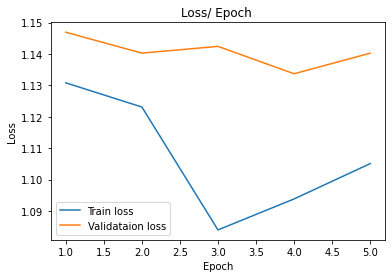

In [15]:


epoch_list = [i+1 for i in range(Epoch)]
plt.plot(epoch_list,train_loss,label="Train loss")
plt.plot(epoch_list,valid_loss,label="Validataion loss")

plt.ylabel('Loss')
plt.xlabel("Epoch")
plt.title("Loss/ Epoch ")
plt.legend()
plt.show()

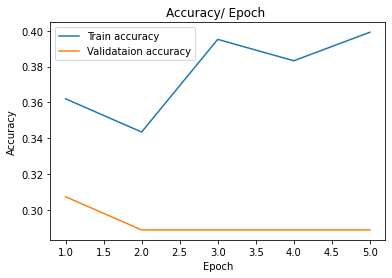

In [16]:
epoch_list = [i+1 for i in range(Epoch)]
plt.plot(epoch_list,train_acc,label="Train accuracy")
plt.plot(epoch_list,valid_acc,label="Validataion accuracy")

plt.ylabel('Accuracy')
plt.xlabel("Epoch")
plt.title("Accuracy/ Epoch ")
plt.legend()
plt.show()

Test : 

In [18]:
dataloader_test= DataLoader(dataset_test, 
                                   sampler=SequentialSampler(dataset_val), 
                                   batch_size=len(test_data))


test_f1score = 0 
test_Accuracy = 0 
test_auc = 0 

model.eval()
for batch in dataloader_test:

  batch = tuple(b.to(device) for b in batch)
    
  inputs = {'input_ids':      batch[0],
            'attention_mask': batch[1],
            'labels':         batch[2],
            }       
  outputs = model(**inputs)


  pred = torch.argmax(outputs[1], dim=1)
  acc_valid_total += torch.sum(pred == inputs['labels']).item()
  prediction = pred.tolist()
  y = inputs['labels'].tolist()
  test_f1score = f1_score(y,prediction,average='micro')
  test_Accuracy  = accuracy_score(y,prediction)
  fpr, tpr, thresholds = metrics.roc_curve(y, prediction, pos_label=3)
  test_auc = metrics.auc(fpr, tpr)


print("Accuracy:", test_Accuracy ," test f1_score :",test_f1score , "test AUC:", test_auc)

